# Problem Statement 

**1. Data Collection:** You are provided with a dataset containing text data from various sources (e.g., product reviews, social media comments, news articles). The dataset is divided into two categories: positive sentiment and negative sentiment. Download the dataset [provide a link to the dataset].

**2. Data Preprocessing:** Clean and preprocess the text data to prepare it for model training. This may include tasks such as tokenization, stemming, and removing stop words.

**3. Model Selection:** Choose an appropriate NLP model for sentiment analysis. You can use pre- trained models like BERT, GPT-3, or train your own model using libraries like TensorFlow or PyTorch.

**4. Model Training:** Train your selected model on the preprocessed data. Split the dataset into training and testing sets to evaluate the model's performance accurately.

**5. Evaluation:** Assess the performance of your sentiment analysis model using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score). Provide a detailed analysis of the model's strengths and weaknesses.

**6. Deployment:** If possible, deploy your model as a web service or API to demonstrate its real-world usability. Include instructions on how to interact with the deployed model.

**7. Documentation:** Create a detailed report that includes the following: o Datapreprocessingsteps.
   - Model architecture and parameters.
   - Training process and hyperparameters.
   - Evaluation results and analysis.
   - Instructions for using the deployed model (if applicable).

In [1]:
!pip install numpy==1.21 --user

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


# Libraries 

In [2]:
# for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# for data pre-processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

##### for modeling

# scikit learn
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# transformers
from transformers import pipeline


# Exploratory Data Analysis & Preprocessing 

In [3]:
df = pd.read_csv("../../data/hate.csv", encoding = 'unicode_escape')
df.head(5)

Unnamed: 0                                            comment label
0           1                                dalits are lowlives     N
1           2             gay people are a burden to our society     N
2           3                              Arabs are not welcome     N
3           4  I'm not saying we should actually eliminate he...     N
4           5                       bananas are for black people     N

In [4]:
# Remove unnecessary columns from dataframe.
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.sample(5) # check sample data

comment label
32067  It is being unkind, to compare being trans wit...     P
14587  He will never propose to you, when you get old...     P
30896                     trans like to fiddle with kids     N
40466                            poofters are disgusting     N
32565  safe to assume all men you meet are toxic. Eac...     P

In [5]:
# EDA on word length
df["word_length"] = df["comment"].apply(lambda x: len(x.split()))
df.word_length.describe()

count    41144.000000
mean        24.333414
std         24.655097
min          1.000000
25%          9.000000
50%         16.000000
75%         31.000000
max        402.000000
Name: word_length, dtype: float64

In [6]:
print(df.shape)
print("After dropiing null values, if any...........")
# drop null values
df = df.dropna()
print(df.shape)


(41144, 3)
After dropiing null values, if any...........
(41144, 3)


In [7]:
##### Analysis:
#We are conducting this word analysis to ensure that sentences with minimal sentiment contain a minimum of 5-8 words.
# mean word length is 24 words
# The longest comment in the dataset contains 402 words, while the shortest comment consists of only 1 word. 
#Additionally, at least 25% of the comments contain 9 words or more, which is important for effectively capturing sentiment.

df[df.word_length.isin([1,402])]

comment label  word_length
3721                                           mcdonalds     P            1
14437                                             Idiot.     P            1
14634                                       motherfucker     P            1
16606  Deeyah Khan firstly is not British. Not only w...     P          402
18309                                   LMFAO!!!!!!!!!!!     P            1
26876                                              covid     P            1
30167                                        FaggotWorld     N            1
30358                                        WomensWorld     P            1
33234                                       NI883RSR3VIL     N            1
33680                                           Y0UR3VIL     P            1
40607                                               Fuck     P            1

In [8]:
pd.set_option("max_colwidth", None)
df[df.word_length.isin([1,402])]

comment  \
3721                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               mcdonalds   
14437                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [9]:
# As observed above, single-word comments may pose a challenge for the model in deriving sentiment accurately.
# When working with natural language comments, it is advisable to eliminate such noise during the model-building process.
# Also, for such short words, we can consider building or utilizing existing dictionaries to identify their sentiments.

df[df.word_length.isin([1,402])].shape


(11, 3)

In [10]:
# since its a small no. we can remove such comments
df = df[df.word_length != 1]
df.shape

(41134, 3)

<AxesSubplot:ylabel='label'>

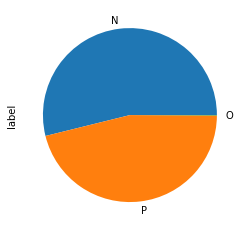

In [11]:
# label distribution shown as Pie chart 
df.label.value_counts().plot(kind="pie")

In [12]:
df.label.value_counts()

N    22156
P    18942
O       36
Name: label, dtype: int64

In [13]:
# We have approximately:
# - 22,156 negative comments
# - 18,942 positive comments
# - 36 neutral comments

# There are more negative samples than the others.

In [14]:
# checking few positive / negative samples
df[df.label=="P"].sample(10)

comment  \
53                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Ill punch anyone that says Indians are filthy again   
31103                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Yes they sure will. God's wrath will be terrible, especially for these inhuman beasts, but again for those who knew that this was going on and did nothing to stop it. May GOD have mercy on their souls, because surely no one else will!   
5795                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             monkeys belong in the jungle, not in captivity   
15604                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  IS THIS GUY FOR REAL? WHAT AN IDIOT.....   
12291                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     I never understand why not everyone thinks the way I do: working with dogs is always better than cats   
20089                                                                                                                                                                                                                                                                                                                                                                                 

In [15]:
# as we can see the labeling is not at par, 
# 4th last & last could have been Negative / Neutral
df[df.label=="N"].sample(10)

comment  \
23863                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Oh God here you go disgusting jews   
26571                                                                                                                                                                                                                                                                                                                                                                                                                                                                 every single hapa gets confused for mexican/latin at one point hahaha eww   
3748                                                                                                                                                                                                                                                                                                                                                                                                                                                             before so many rapefugees came to this fucking country there were jobs aplenty   
3184                                                                                                                                                                                                                                                                                                                                                                                                                                  There are too many black people in this neighbourhood, I want to move out to somewhere less multicultural   
27467  They lack any maternal instinct in the sense that this creature needs to be taught to develop into a functional adult. To them, it???? just another nigl1t crowded into the nest, tolerated only because it counts for gibs, and because it is small and weak enough to be easily exploited. That???? why they be the same at 40 as at age 4, a lack of impulse control or realization that actions have consequences. That???? also why they can???? obey the simplest of commands. Their parenting is like raising tadpoles in a pond.   
20817                                                                                                                                                                                                                                                                                                                             I told you years ago about stupidly contradicting yourself you mozzie. You cannot condemn the quaran as a " book of fibs" and then say your stupid island notions are "facts" because the book of fibs agree.   
6116                                                                                                                                                                                                                                                                                                                                                                                                                she is black and not smart and should not stay with us at school, it should be segregated again so we don't mix with stupid   
22974                                                                                                                                                                                                                                                                           

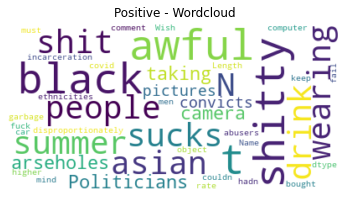

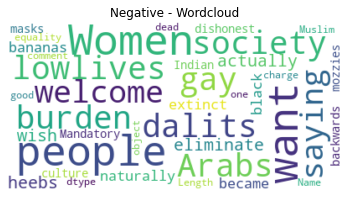

In [16]:
# Wordcloud with positive tweets
positive_tweets = df["comment"][df["label"] == 'P']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with negative tweets
negative_tweets = df["comment"][df["label"] == 'N']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
########### IMP. TO NOTE ###########
##### by seeing word cloud, some negative words represents the positive cloud
##### considering the given labels as a golden labels for the model.


df[df.label=="P"]["word_length"].describe()

count    18942.000000
mean        25.054799
std         24.873064
min          2.000000
25%          9.000000
50%         17.000000
75%         32.000000
max        402.000000
Name: word_length, dtype: float64

In [18]:
df[df.label=="N"]["word_length"].describe()

count    22156.000000
mean        23.724544
std         24.464356
min          2.000000
25%          9.000000
50%         15.000000
75%         30.000000
max        393.000000
Name: word_length, dtype: float64

# Model selection 

**1. In Modeling, we can use standard ML techniques like Bayes/SVM, where we can do text cleanup, stemming and splitting data to training/test set and evaluate.**

**2. The other cutting edge approach we can use is to finetune the pretraing deep learning models**

- The main difference on above two technique is that the later one better understands the natural texture of the comment and identify the sentiment

- For testing purpose, I have tested the modeling with both the approaches down below.
- 1. Bayes
- 2. Bert - pretrained and finetuned over tweet data


# preparing training and testing dataset for modeling 

In [19]:
# Data preprocessing
df.drop(["word_length"], axis=1,inplace=True) # removing as it was for analysis only
df["comment"] = df["comment"].str.replace("[^a-zA-Z\s]", "").str.lower()
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()
df["tokens"] = df["comment"].apply(lambda x: [ps.stem(word) for word in word_tokenize(x) if word not in stop_words])


X_train, X_test, y_train, y_test = train_test_split(df["comment"], df["label"], test_size=0.2, random_state=42)


# Modeling 

## Bayes Theorem

In [20]:
# Bayes Classifier
classifier = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)), ('naive_bayes',MultinomialNB())])


In [21]:
# train the sentiment classifier 
classifier.fit(X_train,y_train)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('naive_bayes', MultinomialNB())])

## evaluate on test set

In [22]:
# test model performance on valid data 
y_preds = classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_preds))


Accuracy: 0.59

Classification Report:
              precision    recall  f1-score   support

           N       0.59      0.78      0.67      4425
           O       0.00      0.00      0.00        10
           P       0.59      0.37      0.45      3792

    accuracy                           0.59      8227
   macro avg       0.39      0.38      0.38      8227
weighted avg       0.59      0.59      0.57      8227



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#save model 
import joblib
joblib.dump(classifier, '/Users/Sarathi/Documents/Prasad_documents/Job_Search/Infovision/pmv/pmv/modelsentiment_model_pipeline.pkl')


['/Users/Sarathi/Documents/Prasad_documents/Job_Search/Infovision/pmv/pmv/modelsentiment_model_pipeline.pkl']

In [24]:
##### for Multinomial Naive Bayes algo, it gave ,
# f1 score: 64% ,
# accuracy: 58%


## with pretrained BERT model

In [25]:
##### Here, by considering the timeline, I am not emphsizing more on training the models et al. we can do this at later stage.
##### Rather, selecting the state of the art model.


In [26]:
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["This is not a nice world", "Whoaa its always great to see you!!!"]
sentiment_pipeline(data)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9997747540473938},
 {'label': 'POSITIVE', 'score': 0.9997982382774353}]

In [27]:
data_df = df[df.label.isin(["P", "N"])]
train_df, test_df, train_label, test_label = train_test_split(data_df["comment"], data_df["label"], test_size=0.2, random_state=42)
test_df.sample(3)


27290    i have had it with listening to your insane and moronic bitching it fills me with rage you bunch of assholes
24573        im sorry but ive got zero idea why people are refusing to call ellen elliot we all know she is a him now
35735                                                                              i n the blackish part of your hair
Name: comment, dtype: object

In [28]:
test_df.shape, test_label.shape

((8220,), (8220,))

In [29]:
%%time
comments = test_df.to_list()
predicted_labels = sentiment_pipeline(comments)


Wall time: 6min 17s


In [30]:
predicted_labels[:3], len(predicted_labels)

([{'label': 'NEGATIVE', 'score': 0.9715060591697693},
  {'label': 'NEGATIVE', 'score': 0.996037483215332},
  {'label': 'NEGATIVE', 'score': 0.6887356042861938}],
 8220)

In [31]:
preds = ["P" if d["label"].startswith("P") else "N" for d in predicted_labels]
preds[:3]

['N', 'N', 'N']

In [32]:
golden_labels_test = test_label.to_list()
golden_labels_test[:3]

['N', 'P', 'P']

In [33]:
len(preds), len(golden_labels_test)

(8220, 8220)

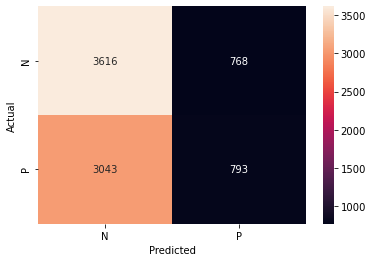

In [34]:
# calculate confusion matrix
cm = confusion_matrix(test_label.to_list(), preds)
# create function for plotting confusion matrix
def plot_cm(cm):
    classes = ["N","P"]
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sns.heatmap(df_cm, annot = True, fmt="g")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plot_cm(cm)

In [35]:
# accuracy: (793+3616)/(793+3616+3043+768) = 53%
# finetuning can help achieving higher accuracy


## finetuning on our data 

In [36]:
# !pip install torch, transformers

In [37]:
from transformers import Trainer, TrainingArguments, AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch import nn
from torch.nn.functional import softmax


In [38]:
# ensure that Accelerator is set to "GPU"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (f'Device Availble: {DEVICE}')


Device Availble: cpu


In [39]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment"


In [40]:
# for reference: refer the torch library
class DataLoader(torch.utils.data.Dataset):
    def __init__(self, sentences=None, labels=None):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        
        if bool(sentences):
            self.encodings = self.tokenizer(self.sentences, padding='max_length', truncation=True, max_length=128)
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels == None:
            item["label"] = None
        else:
            item["label"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.sentences)
    
    
    def encode(self, x):
        return self.tokenizer(x, return_tensors = 'pt').to(DEVICE)


In [41]:
train_dataset = DataLoader(train_df.to_list(), [1 if i == "P" else 0 for i in train_label.to_list()])
test_dataset = DataLoader(test_df.to_list(), [1 if i == "P" else 0 for i in test_label.to_list()])


In [42]:
train_dataset.__getitem__(0)

{'input_ids': tensor([    0,   102,   739, 10301,     9,    82,    33,    41,   939,  1343,
           696,    14,   117,  1265,   467,    64,  4190,     2,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,   

In [43]:
!pip install datasets --user

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [44]:
from transformers import Trainer, TrainingArguments, AutoConfig, AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch import nn
from torch.nn.functional import softmax
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import datasets


In [45]:
f1 = datasets.load_metric('f1')
accuracy = datasets.load_metric('accuracy')
precision = datasets.load_metric('precision')
recall = datasets.load_metric('recall')
def compute_metrics(eval_pred):
    metrics_dict = {}
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    
    metrics_dict.update(f1.compute(predictions = predictions, references = labels, average = 'macro'))
    metrics_dict.update(accuracy.compute(predictions = predictions, references = labels))
    metrics_dict.update(precision.compute(predictions = predictions, references = labels, average = 'macro'))
    metrics_dict.update(recall.compute(predictions = predictions, references = labels, average = 'macro'))
    return metrics_dict

<ipython-input-45-65e699e6a1c1>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  f1 = datasets.load_metric('f1')
C:\Users\Sarathi\AppData\Roaming\Python\Python38\site-packages\datasets\load.py:753: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.17.1/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
C:\Users\Sarathi\AppData\Roaming\Python\Python38\site-packages\datasets\load.py:753: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the met

In [46]:
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [47]:
!pip install accelerate -U

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [48]:
training_args = TrainingArguments(
    output_dir='../../results/',
    num_train_epochs=10,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.05,
    report_to='none',
    evaluation_strategy='steps',
    logging_dir='../../logs/',
    logging_steps=50)


In [49]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    compute_metrics=compute_metrics)


In [ ]:
trainer.train()


In [ ]:
# due to memory limitation (it requires GPU) we couldn't be able to perform training of such models in local.

# The analysis & hypothesis suggests that if we train the model with given data, we could've achive some remarkable accuracy and f1 score.